In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']
%matplotlib inline


/Users/jacobbrewer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


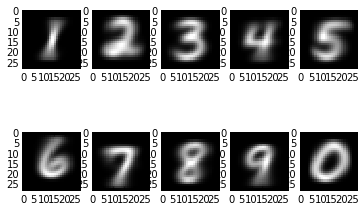

In [4]:
listOfMeans = []

for i in range(0,10,1):
    nextFilteredData = train_data[:, (train_labels == i).ravel()]
    meanImage = np.mean(nextFilteredData, axis = 1) # Mean across columns = axis 0 # Mean across rows is axis 1
    listOfMeans.append(meanImage)

#listOfMeans.insert(0, listOfMeans.pop(9))

plt.figure(1)   # the first figure
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16 # Set Width
fig_size[1] = 8 # Set Height
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(250)             
plt.imshow(listOfMeans[0].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(251)            
plt.imshow(listOfMeans[1].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(252)             
plt.imshow(listOfMeans[2].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(253)            
plt.imshow(listOfMeans[3].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(254)            
plt.imshow(listOfMeans[4].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(255)            
plt.imshow(listOfMeans[5].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(256)            
plt.imshow(listOfMeans[6].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(257)             
plt.imshow(listOfMeans[7].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(258)           
plt.imshow(listOfMeans[8].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(259)            
plt.imshow(listOfMeans[9].reshape(28,28).T, interpolation='nearest',cmap='gray')

plt.show()

In [5]:
def displayImage(imageDisplay):
    plt.imshow(imageDisplay.reshape(28,28).T, interpolation='nearest',cmap='gray')

classification:  1 [1]


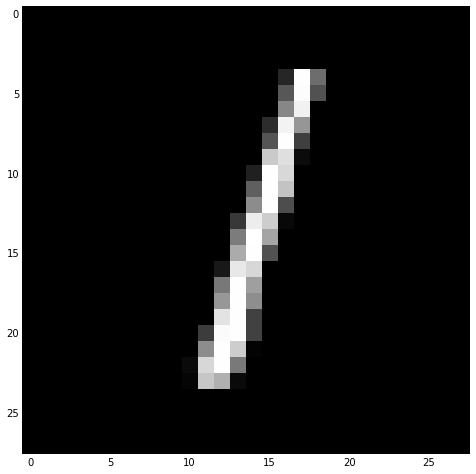

In [6]:
def simpleClassify(testX):
    differences = np.zeros(10)
    for meanImageIndex in range(0, len(listOfMeans), 1):
        imageDiff = np.mean(pow(((testX + listOfMeans[meanImageIndex])/2) - listOfMeans[meanImageIndex] , 2))
        differences[meanImageIndex] = imageDiff
    return np.argmin(differences)
        
#Simple Test
print 'classification: ', simpleClassify(test_data[:,2]), test_labels[2] 
displayImage(test_data[:,2])

0.0143131824903
0.0381193038504
440


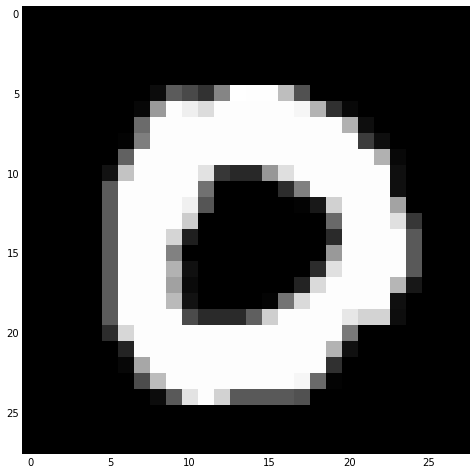

In [11]:
def simpleDiffCalc(testX):
    differences = np.zeros(10)
    for meanImageIndex in range(0, len(listOfMeans), 1):
        imageDiff = np.mean(pow(((testX + listOfMeans[meanImageIndex])/2) - listOfMeans[meanImageIndex] , 2))
        differences[meanImageIndex] = imageDiff
    return np.mean(differences)

print simpleDiffCalc(test_data[:,2])

maxDifferenceToMeans = -1
maxDiffIndex = -1

for i in range(0,1000,1):
    nextDiff = simpleDiffCalc(test_data[:,i])
    if nextDiff > maxDifferenceToMeans:
        maxDifferenceToMeans = nextDiff
        maxDiffIndex = i
    
print maxDifferenceToMeans
print maxDiffIndex

displayImage(test_data[:,maxDiffIndex])

In [20]:
predictions2 = []
maxDiffs = []

pointsToTest = 1000 # 1000
count = 0

for i in range (0,pointsToTest,1):
    X = test_data[:,i]
    scores = np.zeros(10)
    for j in range(0, 10, 1): 
        trainingMatrix = train_data[:,(train_labels == j).ravel()]
        diff =  np.mean(np.exp((-1/2 * np.sum((((X.reshape(784,1) - trainingMatrix ) * (X.reshape(784,1) - trainingMatrix))), axis = 0).ravel())))     
        scores[j] = np.sum(diff)
    predictions2.append(scores)
    maxDiffs.append(np.mean(scores))
    count = count + 1
    print count,'[',np.mean(scores), ']'  
    
np.argmin(maxDiffs)

 1 [ 1.55931843008e-08 ]
2 [ 1.84871579935e-14 ]
3 [ 3.3640241847e-05 ]
4 [ 5.32373083934e-15 ]
5 [ 3.78567515656e-13 ]
6 [ 3.19363171542e-05 ]
7 [ 8.81546030898e-17 ]
8 [ 1.33588267155e-16 ]
9 [ 2.63302159054e-25 ]
10 [ 4.59599853279e-12 ]
11 [ 3.84827962904e-13 ]
12 [ 1.79478926152e-19 ]
13 [ 7.1684802675e-10 ]
14 [ 1.55379548643e-10 ]
15 [ 4.84929580364e-07 ]
16 [ 8.34180881093e-19 ]
17 [ 1.11035323005e-10 ]
18 [ 1.15569156987e-09 ]
19 [ 4.22637730454e-23 ]
20 [ 1.43087974889e-10 ]
21 [ 2.94744393524e-11 ]
22 [ 2.22641840113e-11 ]
23 [ 2.87187519869e-15 ]
24 [ 5.40730042887e-15 ]
25 [ 1.85524573224e-13 ]
26 [ 2.42555052578e-18 ]
27 [ 3.55032701954e-12 ]
28 [ 2.21056441969e-12 ]
29 [ 3.99552074821e-14 ]
30 [ 1.61543954383e-06 ]
31 [ 3.49977016542e-15 ]
32 [ 4.67203561748e-06 ]
33 [ 7.75980357386e-10 ]
34 [ 2.72005716479e-18 ]
35 [ 8.19672642244e-10 ]
36 [ 7.79911155668e-21 ]
37 [ 2.49761262788e-15 ]
38 [ 2.07609911103e-05 ]
39 [ 2.21826647424e-16 ]
40 [ 1.11473349677e-06 ]
41 [ 3.832

151

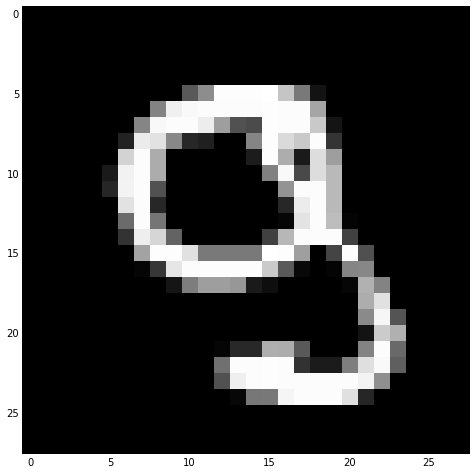

In [21]:
displayImage(test_data[:,np.argmin(maxDiffs)])

In [22]:
np.argmin(maxDiffs)

151

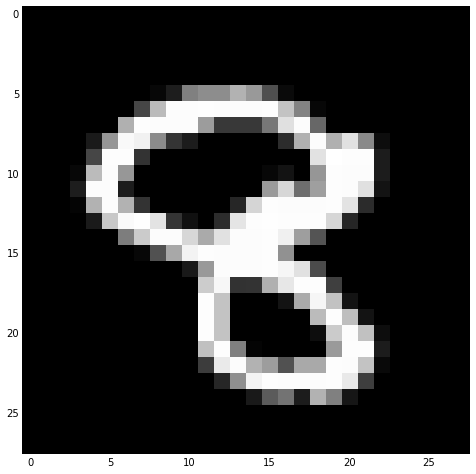

In [27]:
displayImage(test_data[:,787])

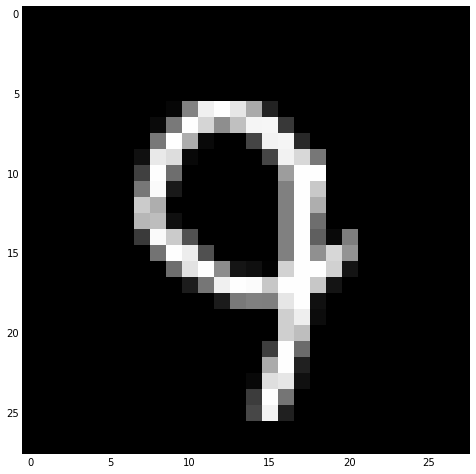

In [29]:
for i in range (0,1000,1):
    displayImage(test_data[:,i])